In [54]:
import nbsetup
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from models.simulation import Simulation
from models.space import Space

In [58]:
size = 50
space = Space([size,size,size])

In [59]:
masses = space.blank()
masses[space.center[0]][space.center[1]][int(space.points[2]*0.2)] = 1
masses[space.center[0]][space.center[1]][int(space.points[2]*0.8)] = 1

In [60]:
solar = Simulation(masses, space, cp=nbsetup.cp)
solar.analyse()

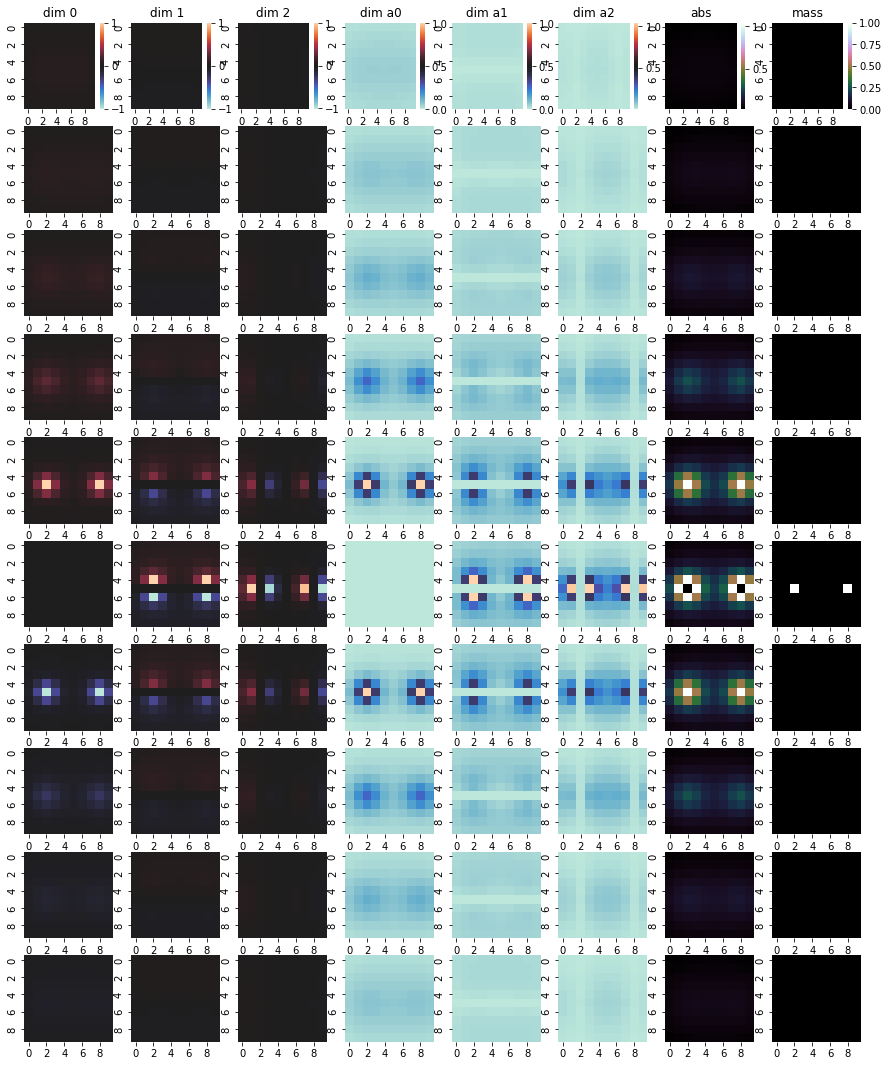

In [15]:
solar.heatmaps()

In [101]:
def trial(self, stack=None, row=None, dimension=0, ylim=(None, None), xlim=(None, None)):
    """ Plots graph for a given dimension """
    
    if stack is None: stack = self.space.center[0]
    if row is None: row = self.space.center[1]
    if ylim is True: ylim = (0, None)
    if xlim is True: xlim = (0, None)
    
    # calcs
    x = self.space.x
    gx = self.sums[dimension][stack][row]
    ax = self.sums['a%s' % dimension][stack][row]
    aa = self.sums['abs'][stack][row]
    
    gxa = np.abs(gx)
    ea = aa-gxa
    ex = ax-gxa
    
    mass = self.sums['mass'][stack][row]
    
    references = {
        'mass': mass,
        'gx': gx,
        'gxa': gxa,
        'ea': ea,
        'ex': ex,
    }
    
    tau = 1/(np.log(ex/ea)*np.log(ax/aa))
    
    attempts = {
        'tau': tau,
        'G': gxa*tau,
        'snu': gxa*(np.log(ex/gxa))**2
        #'ea': (gx/ea)*0.001,
    }
    
    lr = len(references)
    la = len(attempts)
    fig, axes = plt.subplots(lr+la,1,figsize=(15,20))
    
    for i, key in enumerate(references.keys()):
        sns.lineplot(x=x, y=references[key], ax=axes[i]).set(title=key, xlim=xlim, ylim=ylim)
    
    for i, key in enumerate(attempts.keys()):
        sns.lineplot(x=x, y=np.abs(attempts[key]), ax=axes[i+lr], label=key).set(title=key, xlim=xlim, ylim=ylim)
    
    
    return attempts

/var/folders/xp/fglbvhls6671ywk1lqtr308w0000gn/T/ipykernel_4476/1004692608.py:29: RuntimeWarning: invalid value encountered in true_divide
  tau = 1/(np.log(ex/ea)*np.log(ax/aa))
/var/folders/xp/fglbvhls6671ywk1lqtr308w0000gn/T/ipykernel_4476/1004692608.py:29: RuntimeWarning: divide by zero encountered in true_divide
  tau = 1/(np.log(ex/ea)*np.log(ax/aa))
/var/folders/xp/fglbvhls6671ywk1lqtr308w0000gn/T/ipykernel_4476/1004692608.py:33: RuntimeWarning: invalid value encountered in multiply
  'G': gxa*tau,
/var/folders/xp/fglbvhls6671ywk1lqtr308w0000gn/T/ipykernel_4476/1004692608.py:34: RuntimeWarning: divide by zero encountered in true_divide
  'snu': gxa*(np.log(ex/gxa))**2
/var/folders/xp/fglbvhls6671ywk1lqtr308w0000gn/T/ipykernel_4476/1004692608.py:34: RuntimeWarning: divide by zero encountered in log
  'snu': gxa*(np.log(ex/gxa))**2
/var/folders/xp/fglbvhls6671ywk1lqtr308w0000gn/T/ipykernel_4476/1004692608.py:34: RuntimeWarning: invalid value encountered in multiply
  'snu': gxa*(n

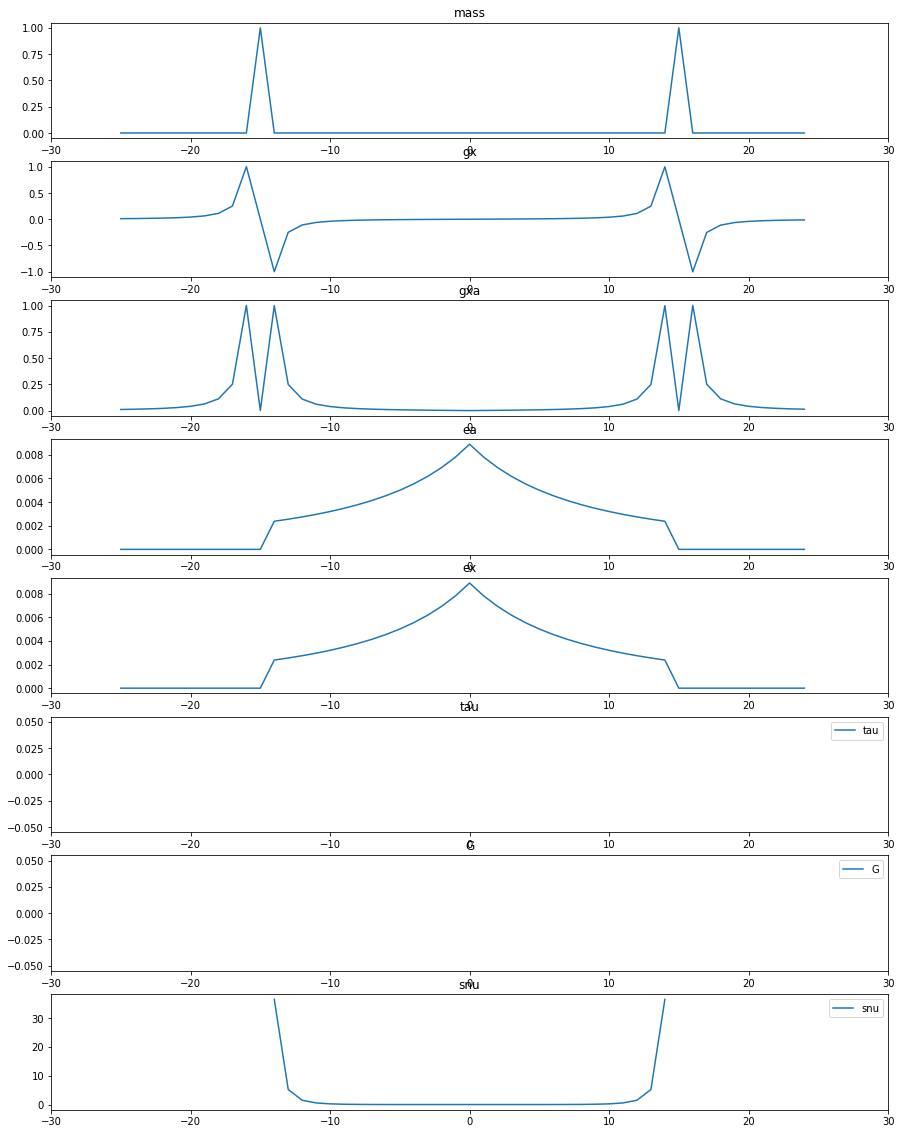

In [102]:
dd = trial(solar, xlim=(-30,+30), dimension=2)

In [103]:
dd['G']

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [26]:
solar.reset_rotation()

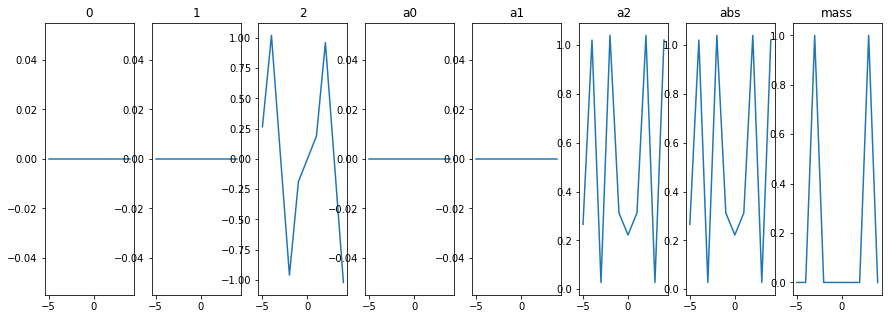

In [28]:
solar.lines()